In [55]:
import sys
#sys.path.append('..')
import os
import json
from time import time
import numpy as np
from tqdm import tqdm

from PIL import Image


data stuff

In [56]:
from fuel.datasets.hdf5 import H5PYDataset
from fuel.schemes import ShuffledScheme, SequentialScheme
from fuel.streams import DataStream
import h5py

try:
    hf["target"].shape
except:
    hf = h5py.File('faces.hdf5','r+')
num_samples = hf["input"].shape[0]

print("number of samples in dataset : %i" %num_samples)

number of samples in dataset : 5120


In [57]:
split_dict = {
     'train': {'input': (2000, num_samples), 'target': (2000, num_samples)},
     'test': {'input': (0, 1000), 'target': (0, 1000)},
     'val': {'input': (1000, 2000), 'target': (1000, 2000)}
}

hf.attrs['split'] = H5PYDataset.create_split_array(split_dict)
train_set = H5PYDataset('faces.hdf5', which_sets=('train',))
test_set = H5PYDataset('faces.hdf5', which_sets=('test',))
val_set = H5PYDataset('faces.hdf5', which_sets=('val',))

#batch_size = 128
batch_size = 12
#TODO : use shuffledscheme instead?  Seems slower, might have screwed up the chunksize in the HDF5 files?

tr_scheme = SequentialScheme(examples=train_set.num_examples, batch_size=batch_size)
tr_stream = DataStream(train_set, iteration_scheme=tr_scheme)

val_scheme = SequentialScheme(examples=val_set.num_examples, batch_size=batch_size)
val_stream = DataStream(val_set, iteration_scheme=val_scheme)

test_scheme = SequentialScheme(examples=test_set.num_examples, batch_size=batch_size)
test_stream = DataStream(test_set, iteration_scheme=test_scheme)

EXAMPLE TARGET IMAGE:


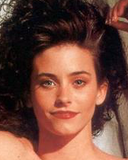

In [58]:
for x_train, x_target in tr_stream.get_epoch_iterator():
    break
print("EXAMPLE TARGET IMAGE:")

Image.fromarray(x_target[3].astype(np.uint8))

EXAMPLE INPUT IMAGE:


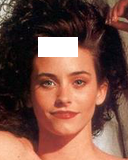

In [59]:
print("EXAMPLE INPUT IMAGE:")
Image.fromarray(x_train[3].astype(np.uint8))